# Support Vector Machines
#### Ing. Luis Felipe Narvaez Gomez. E-mail: luis.narvaez@usantoto.edu.co. Cod: 2312660. Facultad de Ingeniria de Sistemas. USTA

References: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

Las máquinas de vectores de soporte (SVM) son una clase particularmente potente y flexible de algoritmos supervisados ​​tanto para la clasificación como para la regresión.

A continuacion veremos el uso de las SVM en los probelmas de clasificacion de datos. En lo primero importamos las librerias estandar.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from IPython.display import Image

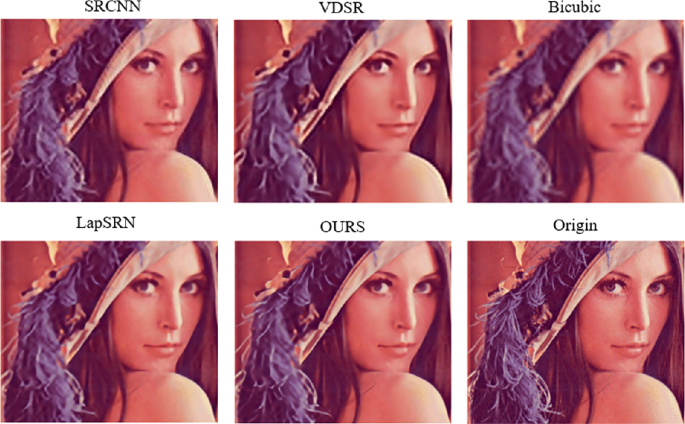

In [2]:
Image("LennaVisionComputingAJA.png")

### Maquinas de Vectores de Soporte.

Cuando nosotros utilizamos las clasificaciones Bayesianas, aprendimos un modelo simple que describe la distribución de cada clase subyacente y usamos estos modelos generativos para determinar etiquetas para nuevos puntos de manera probabilística. Ese fue un ejemplo de clasificación generativa ; aquí consideraremos, en cambio , la clasificación discriminativa.

La clasificacion discriminativa en lugar de modelar cada clase, simplemente encontramos una línea o curva (en dos dimensiones) o una variedad (en múltiples dimensiones) que divide las clases entre sí.

Como ejemplo de esto, considere el caso simple de una tarea de clasificación, en la que las dos clases de puntos están bien separadas como veremos a continuacion.

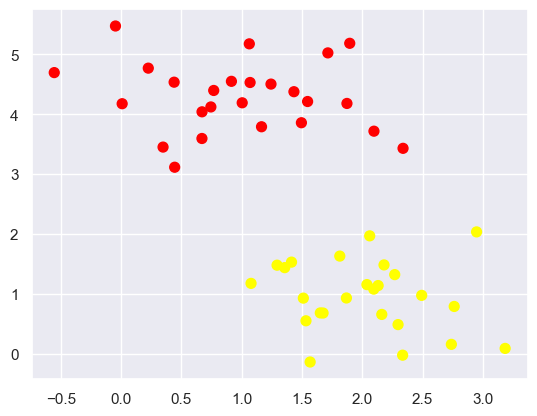

In [5]:
# from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2,random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Un clasificador discriminativo lineal intentaría dibujar una línea recta que separe los dos conjuntos de datos y, por lo tanto, crearía un modelo para la clasificación.

Para datos bidimensionales como los que se muestran aquí, esta es una tarea que podríamos hacer a mano. Pero inmediatamente vemos un problema: ¡hay más de una línea divisoria posible que puede discriminar perfectamente entre las dos clases!

Los podemos dibujar de la siguiente manera:

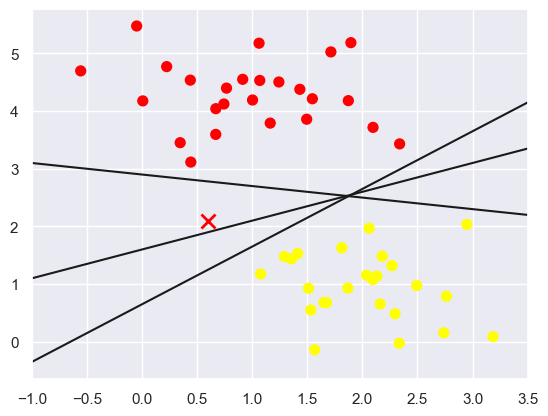

In [6]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

Se trata de tres separadores muy diferentes que, sin embargo, discriminan perfectamente entre estas muestras. Dependiendo de cuál elija, a un nuevo punto de datos (p. ej., el marcado con una "X" en este gráfico) se le asignará una etiqueta diferente. Evidentemente, nuestra simple intuición de ***"trazar una línea entre clases" no es suficiente y necesitamos pensar un poco más profundo***.

### SVM: Maximizando el margen.

Las máquinas de vectores de soporte ofrecen una forma de mejorar esto. La intuición es esta: en lugar de simplemente dibujar una línea de ancho cero entre las clases, podemos dibujar alrededor de cada línea un margen de cierto ancho, hasta el punto más cercano.

Aquí hay un ejemplo de cómo podría verse esto:

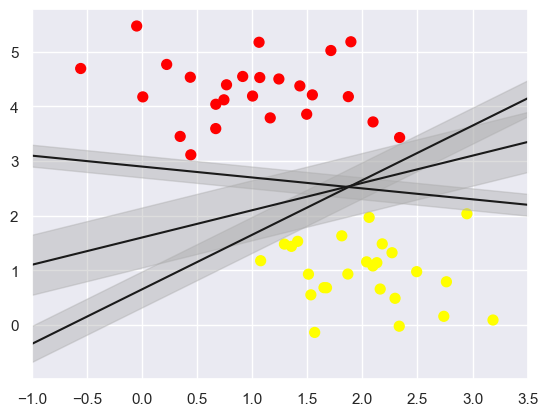

In [7]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

En las máquinas de vectores soporte, la línea que maximiza este margen es la que elegiremos como modelo óptimo. Las máquinas de vectores de soporte son un ejemplo de dicho estimador de margen máximo .

### Ajuste de una maquina de vectores de soporte

Veamos el resultado de un ajuste real a estos datos: usaremos el clasificador de vectores de soporte de Scikit-Learn para entrenar un modelo SVM en estos datos.

Por el momento, usaremos un núcleo lineal y estableceremos el "C" parámetro en un número muy grande 

In [8]:
from sklearn.svm import SVC # "Support vector classifier"

model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

Para visualizar mejor lo que está sucediendo aquí, creemos una función de conveniencia rápida que trazará los límites de decisión de SVM para nosotros:

In [9]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    #Plot the decision function for a 2D SVC
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

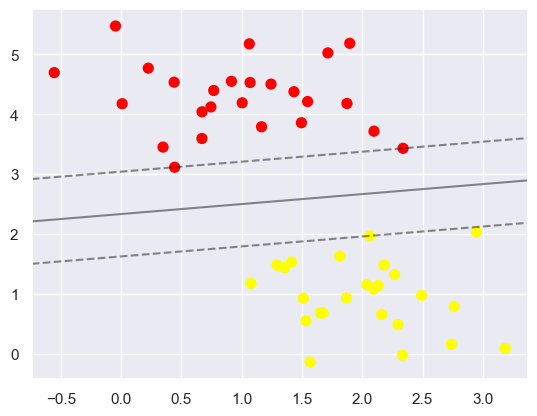

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

Esta es la línea divisoria que maximiza el margen entre los dos conjuntos de puntos. Observe que algunos de los puntos de entrenamiento solo tocan el margen: están indicados por los círculos negros en esta figura. Estos puntos son los elementos fundamentales de este ajuste, se conocen como vectores de soporte y le dan su nombre al algoritmo. 

En Scikit-Learn, la identidad de estos puntos se almacena en el "support_vectors_" atributo del clasificador:

In [13]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Una clave del éxito de este clasificador es que, para el ajuste, solo importa la posición de los vectores de soporte; ¡cualquier punto más alejado del margen que esté en el lado correcto no modifica el ajuste!

Técnicamente, esto se debe a que estos puntos no contribuyen a la función de pérdida utilizada para ajustar el modelo, por lo que su posición y número no importan siempre que no crucen el margen.

Podemos ver esto, por ejemplo, si trazamos el modelo aprendido de los primeros 60 puntos y los primeros 120 puntos de este conjunto de datos:

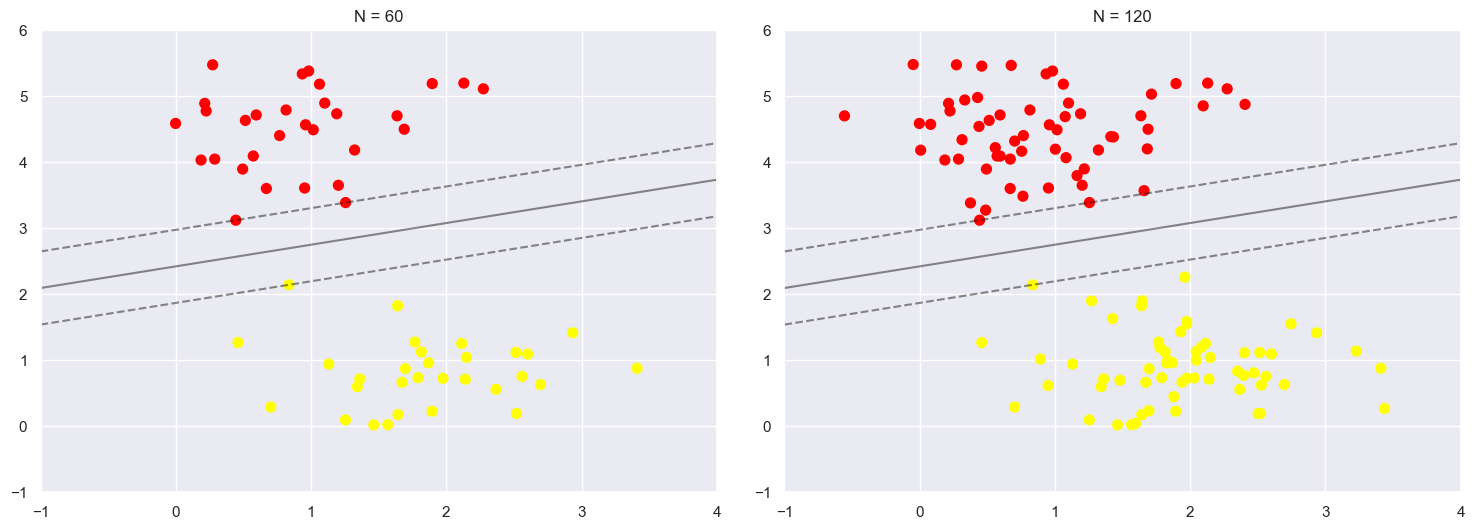

In [14]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

En el panel izquierdo, vemos el modelo y los vectores de soporte para 60 puntos de entrenamiento. 

En el panel de la derecha, hemos duplicado el número de puntos de entrenamiento, pero el modelo no ha cambiado.

Los tres vectores de soporte del panel de la izquierda siguen siendo los vectores de soporte del panel de la derecha. Esta insensibilidad al comportamiento exacto de puntos distantes es una de las fortalezas del modelo SVM.

Podemos ver de forma interactiva con los widjects de IPython mejor esta caracteristica de SVM.

In [18]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

In [17]:
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

### Kernel SVM: mas alla de los limetes lineales

Donde SVM se vuelve extremadamente poderoso es cuando se combina con kernels .

Hemos visto una versión de kernels antes, en las regresiones de función base de la guia de LINEAR REGRESSION adjunta en este mismo trabajo.

Allí proyectamos nuestros datos en un espacio de mayor dimensión definido por polinomios y funciones de base gaussianas y, por lo tanto, pudimos ajustar las relaciones no lineales con un clasificador lineal.

En los modelos SVM, podemos usar una versión de la misma idea. Para motivar la necesidad de núcleos, veamos un ejemplo de algunos datos que no son linealmente separables como los siguientes:

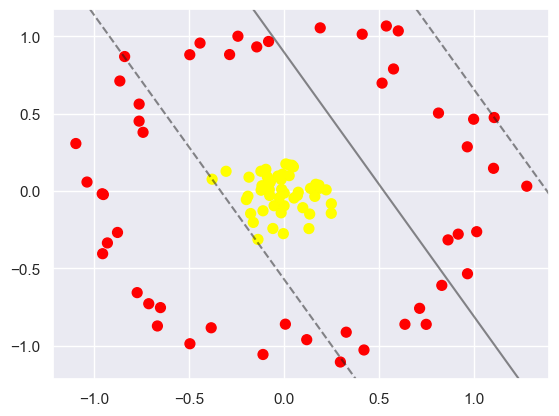

In [20]:
# from sklearn.datasets.samples_generator import make_circles
from sklearn.datasets import make_circles

X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

Está claro que ninguna discriminación lineal podrá jamás separar estos datos. 

Pero podemos extraer una lección de las regresiones de función base en LINEAL REGRESSION  y pensar en cómo podríamos proyectar los datos en una dimensión superior de modo que un separador lineal sea suficiente.

Por ejemplo, una proyección simple que podríamos usar sería calcular una función de base radial centrada en el grupo medio como lo siguiente:

In [21]:
r = np.exp(-(X ** 2).sum(1))

Podemos visualizar esta dimensión de datos adicional mediante un diagrama tridimensional

In [22]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180),X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-1.62977314e-02,  7.49041627e-02],
       [-8.25354647e-02,  9.67157038e-01],
       [-9.30195825e-01, -3.35804724e-01],
       [-1.11770699e-01, -1.27904778e-01],
       [-8.75076638e-04, -9.54792614e-02],
       [-3.79328392e-01,  7.63860409e-02],
       [-1.38231885e-01, -3.13151934e-01],
       [-7.63208272e-01,  5.62152333e-01],
       [ 9.63729198e-01, -5.35010737e-01],
       [ 8.28651739e-01, -6.10302815e-01],
       [-1.36195796e-02,  1.07586977e-02],
       [ 5.92711675e-03, -8.61208099e-01],
       [ 6.92761568e-02, -2.82203135e-02],
       [-9.81805428e-02,  3.69742366e-02],
       [ 9.14930536e-01, -2.78960670e-01],
       [-6.51113718e-01, -7.54064158e-01],
       [-1.22798744e-01,  1.28127195e-01],
       [ 5.14213137e-02, -4.53327936e-02],
       [ 1.65483868e-01,  4.36037179e-02],
       [ 8.42902202e-03,  1.75098426e-01],
       [ 3.25926983e-01, -9.13125928e-01],
       [-5.34191600e-02, -9.51912615e-02],
       

In [23]:
from IPython.display import Image

En caso de no tener un acceso a un notebook y utilizar los widject de interaccion se mostrara semejante a lo siguiente:

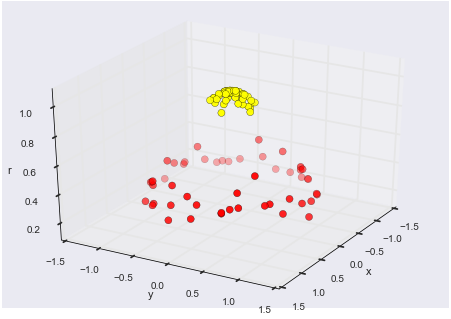

In [25]:
Image("SVMNoLineal.png")

Podemos ver que con esta dimensión adicional, los datos se vuelven trivialmente separables linealmente, dibujando un plano de separación en, digamos, r =0.7.

Aquí tuvimos que elegir y ajustar cuidadosamente nuestra proyección: si no hubiéramos centrado nuestra función de base radial en la ubicación correcta, no habríamos visto resultados tan limpios y linealmente separables.

En general, la necesidad de hacer tal elección es un problema: nos gustaría encontrar de alguna manera automáticamente las mejores funciones básicas para usar.

Una estrategia para este fin es calcular una función base centrada en cada punto del conjunto de datos y dejar que el algoritmo SVM analice los resultados. Este tipo de transformación de función base se conoce como transformación kernel , ya que se basa en una relación de similitud (o kernel) entre cada par de puntos.

Un problema potencial con esta estrategia_proyectar $N$ puntos en $N$ dimensiones, es que podría volverse muy computacionalmente intensivo comonortecrece grande Sin embargo, debido a un pequeño procedimiento ingenioso conocido como el "KERNEL TRICK" , se puede hacer un ajuste en los datos transformados por el núcleo de forma implícita, es decir, sin tener que construir el archivo completo.$N$-dimencional
represetacion de la proyección del núcleo! 

Este truco del núcleo está integrado en SVM y es una de las razones por las que el método es tan poderoso.

En Scikit-Learn, podemos aplicar SVM kernelizado simplemente cambiando nuestro kernel lineal a un kernel RBF (función de base radial), usando el "kernel" hiperparámetro del modelo:

In [26]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

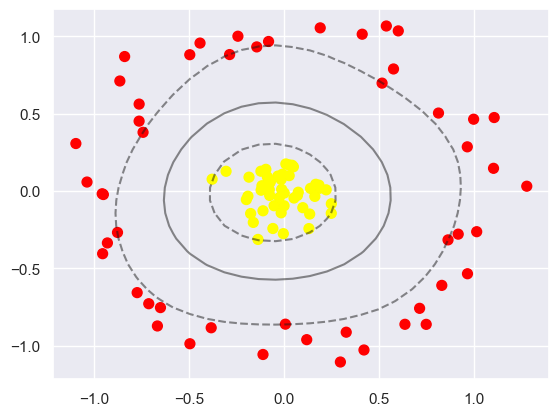

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],s=300, lw=1, facecolors='none');

Usando esta máquina de vectores de soporte kernelizada, aprendemos un límite de decisión no lineal adecuado.

Esta estrategia de transformación del kernel se usa a menudo en el aprendizaje automático para convertir métodos lineales rápidos en métodos no lineales rápidos, especialmente para modelos en los que se puede usar el truco del kernel.

### SVM : suavizando margenes

Nuestra discusión hasta ahora se ha centrado en conjuntos de datos muy limpios, en los que existe un límite de decisión perfecto. Pero, ¿qué pasa si sus datos tienen cierta cantidad de superposición? Por ejemplo, puede tener datos como este:

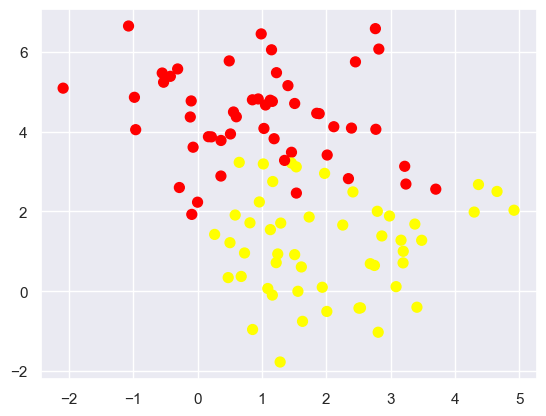

In [29]:
X, y = make_blobs(n_samples=100, centers=2,random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Para manejar este caso, la implementación de SVM tiene un factor de manipulación que "suaviza" el margen: es decir, permite que algunos de los puntos se deslicen hacia el margen si eso permite un mejor ajuste. La dureza del margen está controlada por un parámetro de ajuste, más conocido como $C$.

Para un margen de $C$ muy grande, el margen es duro y los puntos no pueden estar en él. para los más pequeños el margen es más suave y puede crecer para abarcar algunos puntos.

La gráfica que se muestra a continuación da una imagen visual de cómo un cambio de $C$ parámetros afecta el ajuste final, a través del ablandamiento del margen:

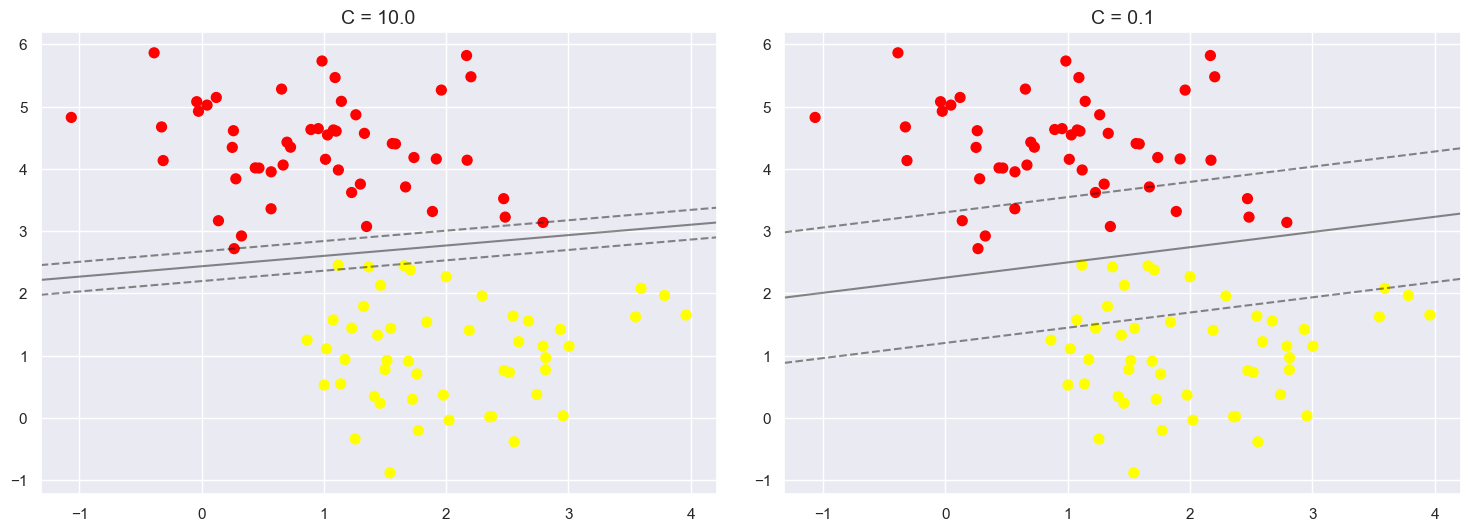

In [30]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

El valor óptimo del parametro $C$ dependerá de su conjunto de datos y debe ajustarse mediante la validación cruzada o un procedimiento similar.

### Ventajas SVM

1. Su dependencia de relativamente pocos vectores de soporte significa que son modelos muy compactos y ocupan muy poca memoria.
2. Una vez entrenado el modelo, la fase de predicción es muy rápida.
3. Debido a que solo se ven afectados por puntos cercanos al margen, funcionan bien con datos de alta dimensión, incluso datos con más dimensiones que muestras, lo cual es un régimen desafiante para otros algoritmos.
4. Su integración con los métodos del núcleo los hace muy versátiles, capaces de adaptarse a muchos tipos de datos.

### Desventajas SVM

1. El escalado con el número de muestras $N$ es $\mathcal{O}[N^3]$ en el peor de los casos,o $\mathcal{O}[N^2]$ para  implementaciones eficientes, para un gran número de muestras de entrenamiento, este costo computacional puede ser prohibitivo.

2. Los resultados dependen en gran medida de una elección adecuada para el parámetro de ablandamiento $C$ Esto debe elegirse cuidadosamente a través de la validación cruzada, lo que puede resultar costoso a medida que los conjuntos de datos aumentan de tamaño.

3. Los resultados no tienen una interpretación probabilística directa. Esto se puede estimar a través de una validación cruzada interna, pero esta estimación adicional es costosa.

Con esos rasgos en mente, generalmente solo recurro a las SVM una vez que se ha demostrado que otros métodos más simples, más rápidos y con menos ajustes intensivos son insuficientes para mis necesidades. Sin embargo, si tiene los ciclos de CPU para comprometerse con el entrenamiento y la validación cruzada de una SVM en sus datos, el método puede generar excelentes resultados.